# k-Means Clustering

This notebook shows simple examples of k-means clustering, the elbow/knee analysis used to select the most adequate number of clusters, and some examples of the known limitations of k-means.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from scipy.spatial.distance import cdist, pdist

import matplotlib
%matplotlib inline

# color palette 
color_palette1 = matplotlib.colors.ListedColormap([plt.cm.Paired.colors[0],plt.cm.Paired.colors[2],plt.cm.Paired.colors[4]], name='DecisionSurfaceColorMap')
color_palette2 = matplotlib.colors.ListedColormap([plt.cm.Paired.colors[1],plt.cm.Paired.colors[3],plt.cm.Paired.colors[5]], name='DataPointsColorMap')

Create artificial dataset

In [2]:
random_state = 1234 ## another interesting example can be generated using the seed 36
no_clusters = 3
no_samples = 1500

x, y = make_blobs(centers=no_clusters, n_samples=no_samples, random_state=random_state)

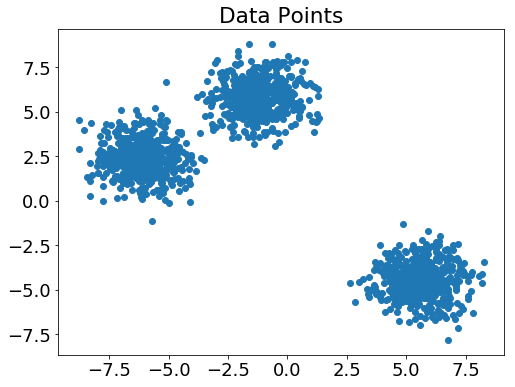

In [3]:
plt.figure(figsize=(8, 6));
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.scatter(x[:,0],x[:,1], cmap=color_palette1);
plt.title("Data Points");

Apply k-means with correxct number k

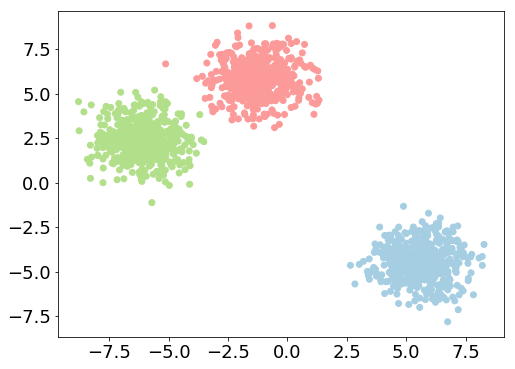

In [4]:
yp = KMeans(n_clusters=3).fit_predict(x)
plt.figure(figsize=(8, 6));
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.scatter(x[:,0],x[:,1],c=yp,cmap=color_palette1);

Next, we apply k-means with different values of k and plot the result.

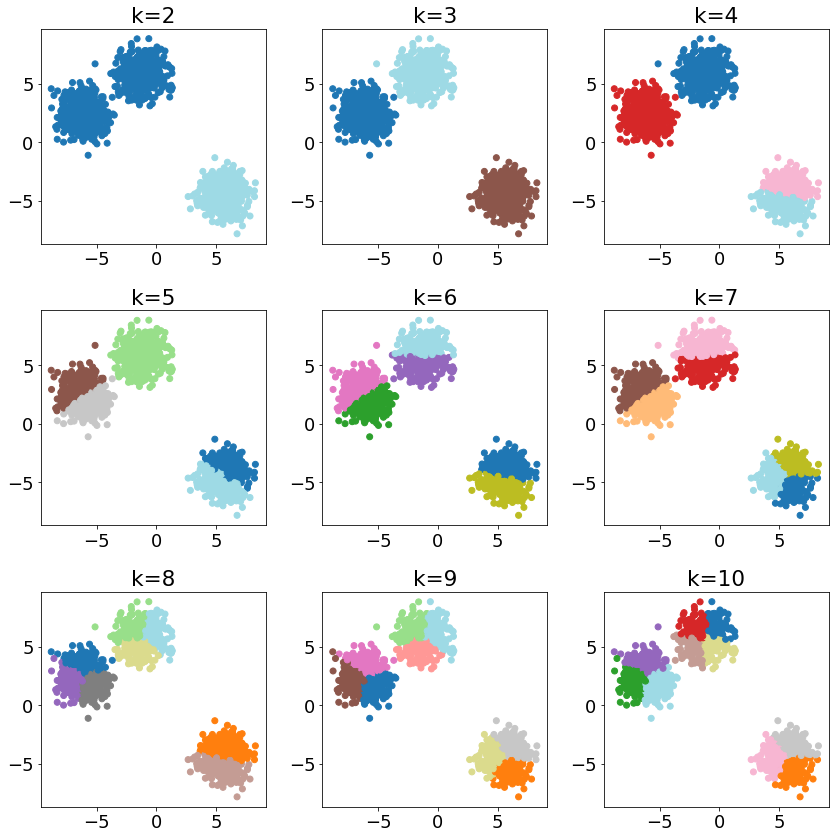

In [5]:
plt.figure(figsize=(12, 12));

for i in range(9):
    yp = KMeans(n_clusters=(i+2)).fit_predict(x)
    plt.subplot(330+(i+1))
    plt.title('k='+str(i+2))
    plt.scatter(x[:, 0], x[:, 1], c=yp,cmap=plt.get_cmap('Vega20'))
    
plt.tight_layout()

Knee / Ellbow Analysis

In [6]:
def KneeElbowAnalysis(x,max_k=20):
    k_values = range(1,max_k)
    clusterings = [KMeans(n_clusters=k, random_state=random_state).fit(x) for k in k_values]
    centroids = [clustering.cluster_centers_ for clustering in clusterings]

    D_k = [cdist(x, cent, 'euclidean') for cent in centroids]
    cIdx = [np.argmin(D,axis=1) for D in D_k]
    dist = [np.min(D,axis=1) for D in D_k]
    avgWithinSS = [sum(d)/x.shape[0] for d in dist]

    # Total with-in sum of square
    wcss = [sum(d**2) for d in dist]

    tss = sum(pdist(x)**2)/x.shape[0]
    bss = tss-wcss

    kIdx = 10-1
    
    #
    # elbow curve
    #
    fig = plt.figure()
    font = {'family' : 'sans', 'size'   : 12}
    plt.rc('font', **font)
    plt.plot(k_values, wcss, 'bo-', color='red', label='WCSS')
    plt.plot(k_values, bss, 'bo-', color='blue', label='BCSS')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.legend()
    plt.title('Knee for KMeans clustering');

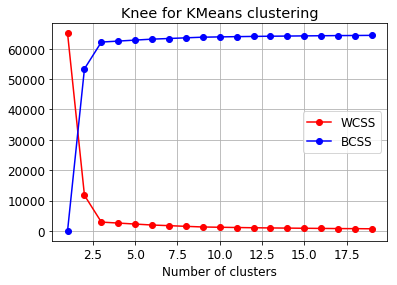

In [7]:
KneeElbowAnalysis(x)

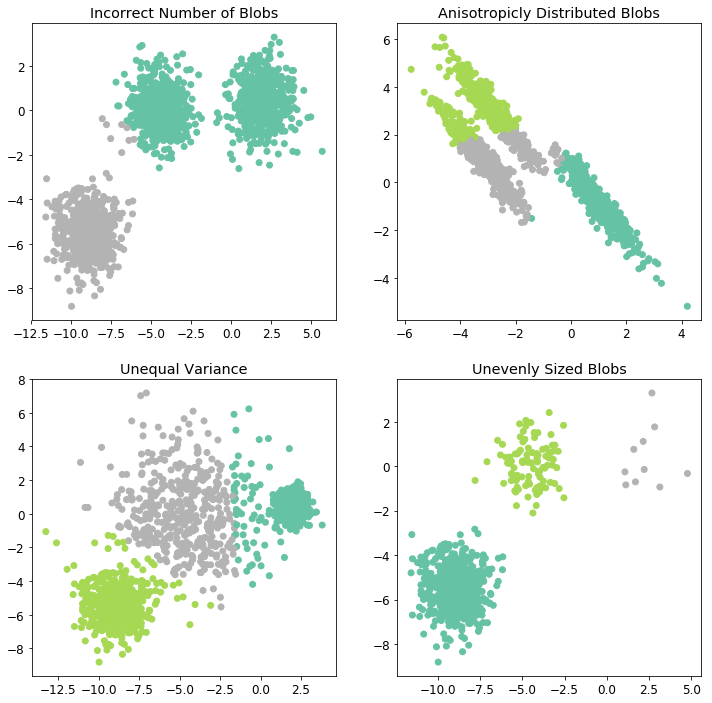

In [8]:
plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.get_cmap('Set2'))
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred, cmap=plt.get_cmap('Set2'))
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred, cmap=plt.get_cmap('Set2'))
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred, cmap=plt.get_cmap('Set2'))
plt.title("Unevenly Sized Blobs")

plt.show()